In [1]:
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore') 


In [28]:
data = pd.read_csv("C:/Users/wjddu/git/BigData/train/train_ori.csv")

In [29]:
data

,date,year,month,day,hour,pow_gen,month.1,hour.1,temperature,humidity,dew_point,sol_rad,cloud
0,2016-12-13-14,2016,12,13,14,140.631,12,14,4.3,77,0.6,100.000,0
1,2016-12-13-15,2016,12,13,15,85.793,12,15,4.3,80,1.1,72.222,0
2,2016-12-13-16,2016,12,13,16,32.590,12,16,3.8,80,0.6,55.556,0
3,2016-12-13-17,2016,12,13,17,0.154,12,17,3.4,80,0.2,13.889,0
4,2016-12-13-18,2016,12,13,18,0.000,12,18,2.6,86,0.4,2.778,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35482,2020-12-31-19,2020,12,31,19,0.000,12,19,-0.9,65,-6.6,0.000,8
35483,2020-12-31-20,2020,12,31,20,0.000,12,20,-1.5,66,-7.0,0.000,8
35484,2020-12-31-21,2020,12,31,21,0.000,12,21,-1.9,75,-5.7,0.000,8
35485,2020-12-31-22,2020,12,31,22,0.000,12,22,-2.7,73,-6.8,0.000,8


In [30]:
data = data.loc[:, ~data.T.duplicated()]
data = data.drop(['hour.1'], axis='columns')

In [31]:
data

,date,year,month,day,hour,pow_gen,temperature,humidity,dew_point,sol_rad,cloud
0,2016-12-13-14,2016,12,13,14,140.631,4.3,77,0.6,100.000,0
1,2016-12-13-15,2016,12,13,15,85.793,4.3,80,1.1,72.222,0
2,2016-12-13-16,2016,12,13,16,32.590,3.8,80,0.6,55.556,0
3,2016-12-13-17,2016,12,13,17,0.154,3.4,80,0.2,13.889,0
4,2016-12-13-18,2016,12,13,18,0.000,2.6,86,0.4,2.778,0
...,...,...,...,...,...,...,...,...,...,...,...
35482,2020-12-31-19,2020,12,31,19,0.000,-0.9,65,-6.6,0.000,8
35483,2020-12-31-20,2020,12,31,20,0.000,-1.5,66,-7.0,0.000,8
35484,2020-12-31-21,2020,12,31,21,0.000,-1.9,75,-5.7,0.000,8
35485,2020-12-31-22,2020,12,31,22,0.000,-2.7,73,-6.8,0.000,8


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35487 entries, 0 to 35486
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         35487 non-null  object 
 1   year         35487 non-null  int64  
 2   month        35487 non-null  int64  
 3   day          35487 non-null  int64  
 4   hour         35487 non-null  int64  
 5   pow_gen      35487 non-null  float64
 6   temperature  35487 non-null  float64
 7   humidity     35487 non-null  int64  
 8   dew_point    35487 non-null  float64
 9   sol_rad      35487 non-null  float64
 10  cloud        35487 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 3.0+ MB


In [32]:
data.isnull().sum()

date           0
year           0
month          0
day            0
hour           0
pow_gen        0
temperature    0
humidity       0
dew_point      0
sol_rad        0
cloud          0
dtype: int64

In [33]:
data.describe()

,year,month,day,hour,pow_gen,temperature,humidity,dew_point,sol_rad,cloud
count,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000
mean,2018.470679,6.590357,15.808747,11.500944,238.973340,13.678336,67.673711,6.832536,144.023715,3.040156
std,1.145249,3.481386,8.796943,6.924057,361.764514,10.079480,23.528315,11.879715,225.608522,3.948471
min,2016.000000,1.000000,1.000000,0.000000,0.000000,-12.900000,0.000000,-26.900000,0.000000,0.000000
25%,2017.000000,4.000000,8.000000,5.000000,0.000000,5.300000,49.000000,-2.100000,0.000000,0.000000
50%,2018.000000,7.000000,16.000000,11.000000,0.170000,14.200000,71.000000,7.500000,2.778000,0.000000
75%,2019.000000,10.000000,23.000000,18.000000,411.734500,21.800000,89.000000,17.100000,230.556000,7.000000
max,2020.000000,12.000000,31.000000,23.000000,1396.853000,39.200000,100.000000,28.000000,975.000000,10.000000


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data[['pow_gen']] = scaler.fit_transform(data[['pow_gen']])
data[['temperature']] = scaler.fit_transform(data[['temperature']])
data[['humidity']] = scaler.fit_transform(data[['humidity']])
data[['dew_point']] = scaler.fit_transform(data[['dew_point']])
data[['sol_rad']] = scaler.fit_transform(data[['sol_rad']])
data[['cloud']] = scaler.fit_transform(data[['cloud']])

data.describe()

,year,month,day,hour,pow_gen,temperature,humidity,dew_point,sol_rad,cloud
count,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000,35487.000000
mean,2018.470679,6.590357,15.808747,11.500944,0.171080,0.510141,0.676737,0.614436,0.147717,0.304016
std,1.145249,3.481386,8.796943,6.924057,0.258985,0.193464,0.235283,0.216388,0.231393,0.394847
min,2016.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,4.000000,8.000000,5.000000,0.000000,0.349328,0.490000,0.451730,0.000000,0.000000
50%,2018.000000,7.000000,16.000000,11.000000,0.000122,0.520154,0.710000,0.626594,0.002849,0.000000
75%,2019.000000,10.000000,23.000000,18.000000,0.294759,0.666027,0.890000,0.801457,0.236468,0.700000
max,2020.000000,12.000000,31.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

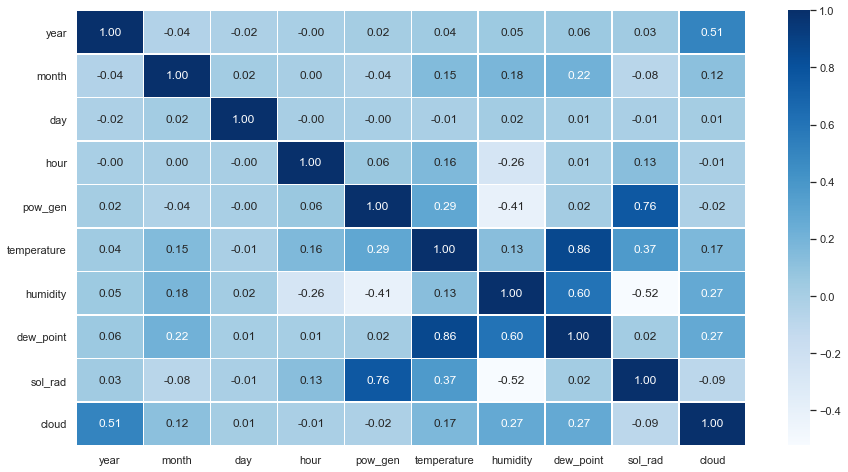

In [39]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.heatmap(data.corr(), annot=True, linewidths=0.5, fmt=".2f", cmap="Blues")

In [50]:
data2 = data['pow_gen', 'sol_rad']
data2

KeyError: ('pow_gen', 'sol_rad')

In [ ]:
import plotly.express as px

fig = px.scatter(economy_df, x="Economic freedom", y="Transfer", trendline="lowess")
fig.add_scatter(x = [0, 1], y = [0, 1], mode = 'lines+markers')
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(economy_df, x="Economic freedom", y="Property rights", trendline="lowess")
fig.add_scatter(x = [0, 1], y = [0, 1], mode = 'lines')
fig.show()

In [ ]:
import plotly.express as px

fig = px.strip(economy_df, x = "Economic freedom", range_x=[0,1], color="year")
fig.show()

In [ ]:
fig = px.line(economy_df, x="year", y="Foreign currency", range_x = [2000,2010])
fig.show()

In [ ]:
import plotly.express as px

fig = px.histogram(economy_df, x="Foreign currency", range_x = [0,1])
fig.show()

In [ ]:
import plotly.express as px

df = px.data.gapminder()

fig = px.scatter(economy_df, x="Economic freedom", y="Economic sound money")
fig.show()

In [ ]:
import plotly.express as px

df = px.data.gapminder()

fig = px.scatter(economy_df, x="Economic freedom", y="Independence of jurisdiction",  size='Military intervention', log_x=True, )
fig.show()

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.lmplot(x="Integrity legal system", y="Military intervention", col="Quaternary", hue="Quaternary", data=economy_df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

In [ ]:
import plotly.express as px

fig = px.scatter(economy_df, x="Economic freedom", y="Military intervention", size='Quaternary', color="year")
fig.show()

In [ ]:
import plotly.express as px

fig = px.histogram(economy_df, x="Money supply")
fig.show()

In [ ]:
import plotly.express as px

fig = px.density_heatmap(economy_df2, x="Foreign currency", y="Trade", marginal_x="histogram", marginal_y="histogram", text_auto=True)
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter(economy_df, x="Integrity legal system", y="Military intervention", color="Quaternary", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter_ternary(economy_df, a="Black market", b="Economic sound money", c="Foreign currency")
fig.show()

In [ ]:
import plotly.express as px

fig = px.histogram(economy_df, x="Labor market regulation", color="Quaternary")
fig.show()

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="Labor market regulation", y="Highest tax rate",
             hue="Quaternary", style="Quaternary",
             data=economy_df)

In [ ]:
import seaborn as sns
sns.set_theme(style="white")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Money supply", y="Inflation", hue="Quaternary", size="Quaternary",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=economy_df)

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="Money supply", y="Foreign currency", data=economy_df,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data=economy_df)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_df = pd.DataFrame(np.random.rand(1000,3), columns = ['Inflation','Economic freedom','Economic sound money'])

sns.pairplot(data=data_df)
plt.show()

In [ ]:
plt.scatter(x = 'Inflation', y = 'Economic freedom', data = economy_df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Engine size vs C02 Emissions', fontsize = 16)
plt.ylabel('CO2 Emissions', fontsize = 12)
plt.xlabel('Engine Size', fontsize = 12)
plt.savefig('enginesize_co2.png')

In [ ]:
plt.scatter(x = 'Inflation', y = 'Economic sound money', data = economy_df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Inflation vs Economic sound money', fontsize = 16)
plt.ylabel('Economic sound money', fontsize = 12)
plt.xlabel('Inflation', fontsize = 12)

In [ ]:
from sklearn.model_selection import train_test_split

X_var = economy_df[['Inflation']]
y_var = economy_df['Economic sound money']
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

In [ ]:
from termcolor import colored as cl
print(cl('R-Squared :', attrs = ['bold']), lr.score(X_test, y_test))

In [ ]:
slr_slope = lr.coef_
slr_intercept = lr.intercept_

sns.scatterplot(x = 'Inflation', y = 'Economic sound money', data = economy_df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.plot(economy_df['Inflation'], slr_slope*economy_df['Economic sound money'] + slr_intercept, color = 'r', linewidth = 1)

plt.title('Inflation vs Economic sound money', fontsize = 16)
plt.ylabel('Economic sound money', fontsize = 12)
plt.xlabel('Inflation', fontsize = 12)
plt.savefig('data.png')

In [ ]:
from sklearn.model_selection import train_test_split
X1_var = economy_df[['Inflation', 'Economic sound money','Economic freedom']]
y_var = economy_df['Black market']

X_train, X_test, y_train, y_test = train_test_split(X1_var, y_var, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

In [ ]:
from termcolor import colored as cl
print(cl('R-Squared :', attrs = ['bold']), 
lr.score(X_test, y_test))

In [ ]:
sns.distplot(yhat, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')

plt.title('Black mareket relation', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Black market', fontsize = 12)

plt.legend(loc = 'upper left', fontsize = 13)
plt.savefig('ap.png')